In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.optimize import curve_fit
import os, mpld3, itertools, matplotlib
from qutip import *
from scipy import interpolate
from cqed_tools.analysis import *

%matplotlib inline

In [19]:
time_constants, collated_a_ss, collated_popt, collated_directories = analyse_tree('.')

time_constants.name = 'time_constants'
time_constants = time_constants.to_dataframe()
time_constants.dropna(inplace=True)
collated_a_ss.name = 'a_ss'
collated_a_ss = collated_a_ss.to_dataframe()
collated_a_ss.dropna(inplace=True)

results = pd.concat([time_constants, collated_a_ss], axis=1)

results.to_hdf('results.h5',key='results')

Loaded Series object.


(10.468, 10.475)

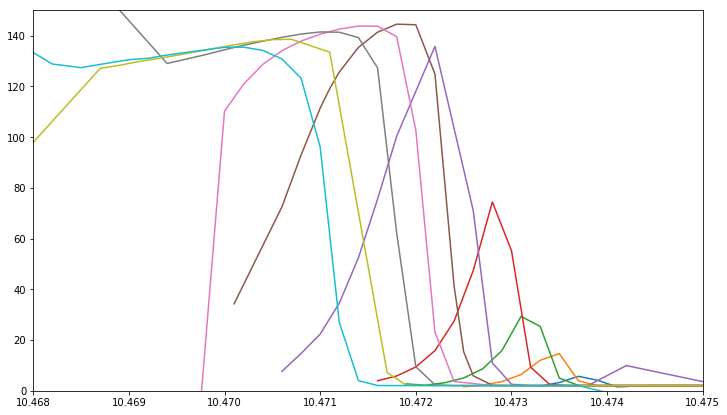

In [20]:
mi = time_constants.index
eps_values = mi.levels[0]

fig, axes = plt.subplots(1,1,figsize=(12,7))

for eps in eps_values:

    cut = time_constants.xs(eps)
    fd_array = cut.index.get_level_values('fd')

    axes.plot(fd_array, cut)
    
axes.set_ylim([0,150])
axes.set_xlim([10.468, 10.475])